# Projet 6 - Classification automatique de biens de consommation

__Context du projet:__

_L'objectif de ce projet est de réaliser une première étude de faisabilité d'un moteur de classification d'articles, basé sur une image et une description, pour l'automatisation de l'attribution de la catégorie de l'article._

_Pour cela, il faut analyser le jeu de données en réalisant un prétraitement des descriptions des produits et des images, une réduction de dimension, puis un clustering._

_Les résultats de la réduction de dimension et du clustering seront à présenter sous la forme de __graphiques__ en deux dimensions, et confirmés par un __calcul de similarité__ entre les catégories réelles et les clusters. Ces résultats illustreront le fait que les caractéristiques extraites permettent de regrouper des produits de même catégorie._

_Ainsi, nous serons en mesure de démontrer, par cette approche de modélisation, la faisabilité de regrouper automatiquement des produits de même catégorie._

__Contraintes__ : 

* Afin d’extraire les features texte, il sera nécessaire de mettre en œuvre : 

  * deux approches de type “bag-of-words”, comptage simple de mots et Tf-idf ;
  * une approche de type word/sentence embedding classique avec Word2Vec (ou Glove ou FastText) ;
  * une approche de type word/sentence embedding avec BERT ;
  * une approche de type word/sentence embedding avec USE (Universal Sentence Encoder). 


* Afin d’extraire les features image, il sera nécessaire de mettre en œuvre :

  * un algorithme de type SIFT / ORB / SURF ;
  * un algorithme de type CNN Transfer Learning.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Text-data-pre-treatment" data-toc-modified-id="Text-data-pre-treatment-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Text data pre-treatment</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Loading data</a></span></li><li><span><a href="#Filtering-data" data-toc-modified-id="Filtering-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Filtering data</a></span><ul class="toc-item"><li><span><a href="#Feature-selection" data-toc-modified-id="Feature-selection-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Feature selection</a></span></li><li><span><a href="#Product-category-column" data-toc-modified-id="Product-category-column-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Product category column</a></span></li></ul></li><li><span><a href="#Text-data-cleaning" data-toc-modified-id="Text-data-cleaning-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Text data cleaning</a></span><ul class="toc-item"><li><span><a href="#Useful-functions" data-toc-modified-id="Useful-functions-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Useful functions</a></span></li><li><span><a href="#Text-transformation" data-toc-modified-id="Text-transformation-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Text transformation</a></span></li><li><span><a href="#Saving-cleaned-text-dataset" data-toc-modified-id="Saving-cleaned-text-dataset-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Saving cleaned text dataset</a></span></li></ul></li></ul></li><li><span><a href="#Mutual-treatments-preparation" data-toc-modified-id="Mutual-treatments-preparation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mutual treatments preparation</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Loading-dataset" data-toc-modified-id="Loading-dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Loading dataset</a></span></li><li><span><a href="#Define-categories" data-toc-modified-id="Define-categories-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Define categories</a></span></li><li><span><a href="#Tokenization" data-toc-modified-id="Tokenization-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Tokenization</a></span></li><li><span><a href="#Useful-functions" data-toc-modified-id="Useful-functions-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Useful functions</a></span></li></ul></li><li><span><a href="#Bag-of-word---Tf-idf" data-toc-modified-id="Bag-of-word---Tf-idf-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bag of word - Tf-idf</a></span><ul class="toc-item"><li><span><a href="#Descriptions-preparation" data-toc-modified-id="Descriptions-preparation-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><em>Descriptions</em> preparation</a></span></li><li><span><a href="#Models-execution" data-toc-modified-id="Models-execution-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Models execution</a></span></li><li><span><a href="#Visual-analysis" data-toc-modified-id="Visual-analysis-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Visual analysis</a></span></li></ul></li><li><span><a href="#Word2Vec" data-toc-modified-id="Word2Vec-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Word2Vec</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Creation-&amp;-training-of-Word2Vec-model" data-toc-modified-id="Creation-&amp;-training-of-Word2Vec-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Creation &amp; training of Word2Vec model</a></span></li><li><span><a href="#Tokenization" data-toc-modified-id="Tokenization-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Tokenization</a></span></li><li><span><a href="#Creation-of-embedding-matrix" data-toc-modified-id="Creation-of-embedding-matrix-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Creation of <em>embedding matrix</em></a></span></li><li><span><a href="#Creation-of-embedding-model" data-toc-modified-id="Creation-of-embedding-model-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Creation of <em>embedding model</em></a></span></li><li><span><a href="#Model-execution" data-toc-modified-id="Model-execution-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Model execution</a></span></li></ul></li><li><span><a href="#BERT---Deep-Learning" data-toc-modified-id="BERT---Deep-Learning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>BERT - <em>Deep Learning</em></a></span><ul class="toc-item"><li><span><a href="#Settings" data-toc-modified-id="Settings-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Settings</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#BERT-function" data-toc-modified-id="BERT-function-5.1.2"><span class="toc-item-num">5.1.2&nbsp;&nbsp;</span>BERT function</a></span></li></ul></li><li><span><a href="#BERT-HuggingFace" data-toc-modified-id="BERT-HuggingFace-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>BERT HuggingFace</a></span><ul class="toc-item"><li><span><a href="#Model-and-sentences-initialization" data-toc-modified-id="Model-and-sentences-initialization-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Model and sentences initialization</a></span></li><li><span><a href="#Features-creation" data-toc-modified-id="Features-creation-5.2.2"><span class="toc-item-num">5.2.2&nbsp;&nbsp;</span>Features creation</a></span></li><li><span><a href="#Model-execution" data-toc-modified-id="Model-execution-5.2.3"><span class="toc-item-num">5.2.3&nbsp;&nbsp;</span>Model execution</a></span></li><li><span><a href="#Visual-analysis" data-toc-modified-id="Visual-analysis-5.2.4"><span class="toc-item-num">5.2.4&nbsp;&nbsp;</span>Visual analysis</a></span></li></ul></li><li><span><a href="#BERT-hub-Tensorflow" data-toc-modified-id="BERT-hub-Tensorflow-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>BERT hub Tensorflow</a></span><ul class="toc-item"><li><span><a href="#Initialization-of-model-and-settings" data-toc-modified-id="Initialization-of-model-and-settings-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Initialization of model and settings</a></span></li><li><span><a href="#Creation-of-features" data-toc-modified-id="Creation-of-features-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Creation of features</a></span></li><li><span><a href="#Model-execution" data-toc-modified-id="Model-execution-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span>Model execution</a></span></li><li><span><a href="#Visual-analysis" data-toc-modified-id="Visual-analysis-5.3.4"><span class="toc-item-num">5.3.4&nbsp;&nbsp;</span>Visual analysis</a></span></li></ul></li></ul></li><li><span><a href="#USE---Universal-Sentence-Encoder" data-toc-modified-id="USE---Universal-Sentence-Encoder-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>USE - Universal Sentence Encoder</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#USE-functions" data-toc-modified-id="USE-functions-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>USE functions</a></span></li><li><span><a href="#Setting-and-features-creation" data-toc-modified-id="Setting-and-features-creation-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Setting and features creation</a></span></li><li><span><a href="#Model-execution" data-toc-modified-id="Model-execution-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Model execution</a></span></li><li><span><a href="#Visual-analysis" data-toc-modified-id="Visual-analysis-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Visual analysis</a></span></li></ul></li><li><span><a href="#SIFT" data-toc-modified-id="SIFT-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>SIFT</a></span><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Initialization</a></span><ul class="toc-item"><li><span><a href="#Import-libraries-and-settings" data-toc-modified-id="Import-libraries-and-settings-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>Import libraries and settings</a></span></li><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-7.1.2"><span class="toc-item-num">7.1.2&nbsp;&nbsp;</span>Load dataset</a></span></li><li><span><a href="#Defining-categories" data-toc-modified-id="Defining-categories-7.1.3"><span class="toc-item-num">7.1.3&nbsp;&nbsp;</span>Defining categories</a></span></li></ul></li><li><span><a href="#Displaying-of-some-image-examples-by-category" data-toc-modified-id="Displaying-of-some-image-examples-by-category-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Displaying of some image examples by category</a></span></li><li><span><a href="#Determination-of-SIFT-descriptors-and-display,-step-by-step" data-toc-modified-id="Determination-of-SIFT-descriptors-and-display,-step-by-step-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Determination of SIFT descriptors and display, step-by-step</a></span></li><li><span><a href="#Creations-of-descriptors-for-each-image" data-toc-modified-id="Creations-of-descriptors-for-each-image-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Creations of descriptors for each image</a></span></li><li><span><a href="#Creation-of-descriptors-clusters" data-toc-modified-id="Creation-of-descriptors-clusters-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Creation of descriptors clusters</a></span></li><li><span><a href="#Creation-of-images-features" data-toc-modified-id="Creation-of-images-features-7.6"><span class="toc-item-num">7.6&nbsp;&nbsp;</span>Creation of images features</a></span></li><li><span><a href="#Dimension-reduction-de-dimensions" data-toc-modified-id="Dimension-reduction-de-dimensions-7.7"><span class="toc-item-num">7.7&nbsp;&nbsp;</span>Dimension reduction de dimensions</a></span><ul class="toc-item"><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-7.7.1"><span class="toc-item-num">7.7.1&nbsp;&nbsp;</span>Principal Component Analysis</a></span></li><li><span><a href="#t-SNE" data-toc-modified-id="t-SNE-7.7.2"><span class="toc-item-num">7.7.2&nbsp;&nbsp;</span>t-SNE</a></span></li></ul></li><li><span><a href="#Results-analyses" data-toc-modified-id="Results-analyses-7.8"><span class="toc-item-num">7.8&nbsp;&nbsp;</span>Results analyses</a></span><ul class="toc-item"><li><span><a href="#Visual-analysis" data-toc-modified-id="Visual-analysis-7.8.1"><span class="toc-item-num">7.8.1&nbsp;&nbsp;</span>Visual analysis</a></span></li><li><span><a href="#Analysis-by-classes" data-toc-modified-id="Analysis-by-classes-7.8.2"><span class="toc-item-num">7.8.2&nbsp;&nbsp;</span>Analysis by classes</a></span></li></ul></li></ul></li><li><span><a href="#CNN-&amp;-Transfer-Learning---VGG16" data-toc-modified-id="CNN-&amp;-Transfer-Learning---VGG16-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>CNN &amp; Transfer Learning - VGG16</a></span><ul class="toc-item"><li><span><a href="#Settings-for-VGG16" data-toc-modified-id="Settings-for-VGG16-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Settings for VGG16</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-8.1.1"><span class="toc-item-num">8.1.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Image-preprocessing" data-toc-modified-id="Image-preprocessing-8.1.2"><span class="toc-item-num">8.1.2&nbsp;&nbsp;</span>Image preprocessing</a></span></li><li><span><a href="#Initialization-of-pre-trained-VGG16" data-toc-modified-id="Initialization-of-pre-trained-VGG16-8.1.3"><span class="toc-item-num">8.1.3&nbsp;&nbsp;</span>Initialization of pre-trained VGG16</a></span></li></ul></li><li><span><a href="#Transfer-learning" data-toc-modified-id="Transfer-learning-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Transfer learning</a></span><ul class="toc-item"><li><span><a href="#Features-extraction-without-re-training" data-toc-modified-id="Features-extraction-without-re-training-8.2.1"><span class="toc-item-num">8.2.1&nbsp;&nbsp;</span>Features extraction without re-training</a></span></li></ul></li><li><span><a href="#Dimension-reduction" data-toc-modified-id="Dimension-reduction-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Dimension reduction</a></span><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-8.3.1"><span class="toc-item-num">8.3.1&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#t-SNE" data-toc-modified-id="t-SNE-8.3.2"><span class="toc-item-num">8.3.2&nbsp;&nbsp;</span>t-SNE</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-8.3.2.1"><span class="toc-item-num">8.3.2.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-8.3.2.2"><span class="toc-item-num">8.3.2.2&nbsp;&nbsp;</span>Functions</a></span></li></ul></li></ul></li><li><span><a href="#Model-execution" data-toc-modified-id="Model-execution-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Model execution</a></span></li><li><span><a href="#Visual-analysis" data-toc-modified-id="Visual-analysis-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Visual analysis</a></span></li></ul></li><li><span><a href="#Gathering-of-image-and-description-features" data-toc-modified-id="Gathering-of-image-and-description-features-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Gathering of image and description features</a></span><ul class="toc-item"><li><span><a href="#Features-concatenation" data-toc-modified-id="Features-concatenation-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Features concatenation</a></span></li><li><span><a href="#t-SNE,-clustering-and-ARI" data-toc-modified-id="t-SNE,-clustering-and-ARI-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>t-SNE, clustering and ARI</a></span></li><li><span><a href="#Visual-analysis" data-toc-modified-id="Visual-analysis-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Visual analysis</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#For-fun---not-working-yet" data-toc-modified-id="For-fun---not-working-yet-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>For fun - not working yet</a></span></li></ul></div>

# Part 1 - Text data
## Text data pre-treatment

### Import libraries

In [1]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data

In [2]:
data = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')  # Loading dataset
print(data.shape) # displays shape of dataset

(1050, 15)


In [4]:
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

In [6]:
data.duplicated().sum()

0

### Filtering data
#### Feature selection

In [3]:
df = data[['product_name', 'product_category_tree', 'description']]  # Select only columns of interest
df.head()

,product_name,product_category_tree,description
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Key Features of Eurospa Cotton Terry Face Towe...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of SANTOSH ROYAL FASHION Cotton P...
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of Jaipur Print Cotton Floral Kin...


#### Product category column

In [4]:
# Split of product_category_tree to extract only the categorie of level 0 (7 categories)

product_category_tree = df['product_category_tree'].str.split(pat='>>', expand=True)

product_category_tree.columns = ['product_category_name_0',
                                      'product_category_name_1',
                                      'product_category_name_2',
                                      'product_category_name_3',
                                     'product_category_name_4',
                                     'product_category_name_5',
                                     'product_category_name_6']

In [5]:
# Correcting the names of product categories after str splitting

product_category_tree['product_category_name_0'] = product_category_tree['product_category_name_0'].replace(
    to_replace=('["Home Furnishing ',
                '["Baby Care ',
                '["Watches ',
                '["Home Decor & Festive Needs ',
                '["Kitchen & Dining ',
                '["Beauty and Personal Care ',
                '["Computers '),
    value=('Home Furnishing',
           'Baby Care',
           'Watches',
           'Home Decor & Festive Needs',
           'Kitchen & Dining',
           'Beauty and Personal Care',
           'Computers'))

In [6]:
product_category_tree['product_category_name_0'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [8]:
# Only 7 categories of level 0
# Merging with df

df = pd.merge(df, product_category_tree, left_index=True, right_index=True)
df.head()

,product_name,product_category_tree,description,product_category_name_0,product_category_name_1,product_category_name_2,product_category_name_3,product_category_name_4,product_category_name_5,product_category_name_6
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Curtains & Accessories,Curtains,Elegance Polyester Multicolor Abstract Eyelet...,None,None,None
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Baby Bath & Skin,Baby Bath Towels,Sathiyas Baby Bath Towels,"Sathiyas Cotton Bath Towel (3 Bath Towel, Red...",None,None
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Baby Bath & Skin,Baby Bath Towels,Eurospa Baby Bath Towels,Eurospa Cotton Terry Face Towel Set (20 PIECE...,None,None
3,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,Bed Linen,Bedsheets,SANTOSH ROYAL FASHION Bedsheets,SANTOSH ROYAL FASHION Cotton Printed King siz...,None,None
4,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Bed Linen,Bedsheets,Jaipur Print Bedsheets,Jaipur Print Cotton Floral King sized Double ...,None,None


In [9]:
# For this project, we keep only 7 categories and delete others category levels
droplist = ['product_category_tree',
            'product_category_name_1',
            'product_category_name_2',
            'product_category_name_3',
            'product_category_name_4', 
            'product_category_name_5',
            'product_category_name_6']
df = df.drop(droplist, axis=1)

In [49]:
df.head()

,product_name,description,product_category_name_0
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing


In [50]:
# Adding a column containing product name + description
df['product_name_and_description'] = df['product_name'] + " " + df['description']
df.head()

,product_name,description,product_category_name_0,product_name_and_description
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Elegance Polyester Multicolor Abstract Eyelet ...
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Sathiyas Cotton Bath Towel Specifications of S...
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Eurospa Cotton Terry Face Towel Set Key Featur...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,SANTOSH ROYAL FASHION Cotton Printed King size...
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Jaipur Print Cotton Floral King sized Double B...


### Text data cleaning
#### Useful functions

In [34]:
# Tokenizer
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizer_fct(sentence) :
    """
    This function removes punctuation from a sentence and returns a list of tokens. Based on NLTK.word_tokenize() 
    Input : sentence (str)
    Output : word_tokens (list of str)
    """"
    # print(sentence)
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ').replace('.', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Stop words
from nltk.corpus import stopwords
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']

def stop_word_filter_fct(list_words) :
    """
    This function removes stop words and punctuation from a list of tokens. Based on NLTK.stopwords.words()
    Input : list_words : list of words (list of str)
    Output : filtered_w2 : list of words with length > 2 (list of str)
    """
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2

# lower case et alpha
def lower_start_fct(list_words) :
    """
    This function replaces upper case caracters with their lower case equivalent. 
    Filtering of regex if desired (@, #, http, .com)
    Input : list_words : list of words (list of str)
    Output : lw : list of lowercase words (list of str)
    """
    lw = [w.lower() for w in list_words if (not w.startswith("@")) 
    #                                   and (not w.startswith("#"))
                                       and (not w.startswith("http"))
                                       and (not w.endswith(".com"))]
    return lw

# Lemmatizer (base d'un mot)
from nltk.stem import WordNetLemmatizer

def lemma_fct(list_words) :
    """
    This fuction lemmatizes a list of words. Based on NLTK WordNetLemmatizer.
    Input : list_words : list of words (list of str)
    Output : lem_w : list of lemmatized words (list of str)
    """
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text) :
    """
    This function preprocesses text data for bag_of_word: tokenization, stop words filtering, lowercase, 
    (lemmatization:optionnal), joining tokens in a document.
    Lemmatization step is optionnal, should be used for word embedding or deep learning
    Input : desc_text : a raw text data (str)
    Output : transf_desc_text : pre-processed text data (str)
    """
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text) :
    """
    This function preprocesses text data for NLP: tokenization, stop words filtering, lowercase, 
    lemmatization, joining tokens in a document.
    Input : desc_text : a raw text data (str)
    Output : transf_desc_text : pre-processed text data (str)
    """
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lem_w)
    return transf_desc_text

# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text) :
    """
    This function preprocesses text data for deep learning approach (USE, BERT):
    tokenization, lowercase, joining tokens in a document.
    Input : desc_text : a raw text data (str)
    Output : transf_desc_text : pre-processed text data (str)
    """
    word_tokens = tokenizer_fct(desc_text)
    # sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)    
    transf_desc_text = ' '.join(lw)
    return transf_desc_text

In [40]:
text = df['description'].loc[77]
text

'Giorgio Armani SMOOTH SILK LIP PENCIL 12 (Soyeux 12) Price: Rs. 1,710 Glides on smoothly and defines the look of your lips with gorgeous colour.,Specifications of Giorgio Armani SMOOTH SILK LIP PENCIL 12 (Soyeux 12) Lip Liner Details Dual-tipped No Shade Soyeux 12 Waterproof No Smudge-free No Size 1.14 In the Box 1 Lip Pencil'

In [41]:
tokens = tokenizer_fct(text)
tokens

['Giorgio',
 'Armani',
 'SMOOTH',
 'SILK',
 'LIP',
 'PENCIL',
 '12',
 '(',
 'Soyeux',
 '12',
 ')',
 'Price',
 ':',
 'Rs',
 '1,710',
 'Glides',
 'on',
 'smoothly',
 'and',
 'defines',
 'the',
 'look',
 'of',
 'your',
 'lips',
 'with',
 'gorgeous',
 'colour',
 ',',
 'Specifications',
 'of',
 'Giorgio',
 'Armani',
 'SMOOTH',
 'SILK',
 'LIP',
 'PENCIL',
 '12',
 '(',
 'Soyeux',
 '12',
 ')',
 'Lip',
 'Liner',
 'Details',
 'Dual',
 'tipped',
 'No',
 'Shade',
 'Soyeux',
 '12',
 'Waterproof',
 'No',
 'Smudge',
 'free',
 'No',
 'Size',
 '1',
 '14',
 'In',
 'the',
 'Box',
 '1',
 'Lip',
 'Pencil']

In [42]:
tokens = stop_word_filter_fct(tokens)
tokens

['Giorgio',
 'Armani',
 'SMOOTH',
 'SILK',
 'LIP',
 'PENCIL',
 'Soyeux',
 'Price',
 '1,710',
 'Glides',
 'smoothly',
 'defines',
 'look',
 'lips',
 'gorgeous',
 'colour',
 'Specifications',
 'Giorgio',
 'Armani',
 'SMOOTH',
 'SILK',
 'LIP',
 'PENCIL',
 'Soyeux',
 'Lip',
 'Liner',
 'Details',
 'Dual',
 'tipped',
 'Shade',
 'Soyeux',
 'Waterproof',
 'Smudge',
 'free',
 'Size',
 'Box',
 'Lip',
 'Pencil']

In [43]:
tokens = lower_start_fct(tokens)
tokens

['giorgio',
 'armani',
 'smooth',
 'silk',
 'lip',
 'pencil',
 'soyeux',
 'price',
 '1,710',
 'glides',
 'smoothly',
 'defines',
 'look',
 'lips',
 'gorgeous',
 'colour',
 'specifications',
 'giorgio',
 'armani',
 'smooth',
 'silk',
 'lip',
 'pencil',
 'soyeux',
 'lip',
 'liner',
 'details',
 'dual',
 'tipped',
 'shade',
 'soyeux',
 'waterproof',
 'smudge',
 'free',
 'size',
 'box',
 'lip',
 'pencil']

In [44]:
tokens = lemma_fct(tokens)
tokens

['giorgio',
 'armani',
 'smooth',
 'silk',
 'lip',
 'pencil',
 'soyeux',
 'price',
 '1,710',
 'glide',
 'smoothly',
 'defines',
 'look',
 'lip',
 'gorgeous',
 'colour',
 'specification',
 'giorgio',
 'armani',
 'smooth',
 'silk',
 'lip',
 'pencil',
 'soyeux',
 'lip',
 'liner',
 'detail',
 'dual',
 'tipped',
 'shade',
 'soyeux',
 'waterproof',
 'smudge',
 'free',
 'size',
 'box',
 'lip',
 'pencil']

#### Text transformation

In [52]:
# Bag-of-words and lemmatization of product name :
df['product_name_bow_lem'] = df['product_name'].apply(lambda x : transform_bow_lem_fct(x))

# Bag-of-words and lemmatization of product category : 
df['product_category_name_0_bow_lem'] = df['product_category_name_0'].apply(lambda x : transform_bow_lem_fct(x))

# Bag-of-words of description :
df['description_bow'] = df['description'].apply(lambda x : transform_bow_fct(x))

# Bag-of-words and lemmatization of description :
df['description_bow_lem'] = df['description'].apply(lambda x : transform_bow_lem_fct(x))

# Deep learning preparation of description
df['description_dl'] = df['description'].apply(lambda x : transform_dl_fct(x))

# Bag-of-words of product name and description :
df['product_name_and_description_bow'] = df['product_name_and_description'].apply(lambda x : transform_bow_fct(x))

# Bag-of-words and lemmatization of product name and description :
df['product_name_and_description_bow_lem'] = df['product_name_and_description'].apply(lambda x : transform_bow_lem_fct(x))

df.shape  # Shape of the global dataset after all text pre-treatments

(1050, 11)

In [53]:
df.head()

,product_name,description,product_category_name_0,product_name_and_description,product_name_bow_lem,product_category_name_0_bow_lem,description_bow,description_bow_lem,description_dl,product_name_and_description_bow,product_name_and_description_bow_lem
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Elegance Polyester Multicolor Abstract Eyelet ...,elegance polyester multicolor abstract eyelet ...,home furnishing,key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...,elegance polyester multicolor abstract eyelet ...,elegance polyester multicolor abstract eyelet ...
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Sathiyas Cotton Bath Towel Specifications of S...,sathiyas cotton bath towel,baby care,specifications sathiyas cotton bath towel bath...,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...,sathiyas cotton bath towel specifications sath...,sathiyas cotton bath towel specification sathi...
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Eurospa Cotton Terry Face Towel Set Key Featur...,eurospa cotton terry face towel set,baby care,key features eurospa cotton terry face towel s...,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...,eurospa cotton terry face towel set key featur...,eurospa cotton terry face towel set key featur...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,SANTOSH ROYAL FASHION Cotton Printed King size...,santosh royal fashion cotton printed king size...,home furnishing,key features santosh royal fashion cotton prin...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...,santosh royal fashion cotton printed king size...,santosh royal fashion cotton printed king size...
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Jaipur Print Cotton Floral King sized Double B...,jaipur print cotton floral king sized double b...,home furnishing,key features jaipur print cotton floral king s...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...,jaipur print cotton floral king sized double b...,jaipur print cotton floral king sized double b...


#### Saving cleaned text dataset

In [54]:
df.to_csv("text_data_P6_cleaned.csv", index=False)

## Mutual treatments preparation

### Import libraries

In [2]:
# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import pickle
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition
import logging

logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere


### Loading dataset

In [56]:
data_T =  pd.read_csv("text_data_P6_cleaned.csv")
print(data_T.shape)

(1050, 11)


In [57]:
data_T.head()

,product_name,description,product_category_name_0,product_name_and_description,product_name_bow_lem,product_category_name_0_bow_lem,description_bow,description_bow_lem,description_dl,product_name_and_description_bow,product_name_and_description_bow_lem
0,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,Elegance Polyester Multicolor Abstract Eyelet ...,elegance polyester multicolor abstract eyelet ...,home furnishing,key features elegance polyester multicolor abs...,key feature elegance polyester multicolor abst...,key features of elegance polyester multicolor ...,elegance polyester multicolor abstract eyelet ...,elegance polyester multicolor abstract eyelet ...
1,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,Sathiyas Cotton Bath Towel Specifications of S...,sathiyas cotton bath towel,baby care,specifications sathiyas cotton bath towel bath...,specification sathiyas cotton bath towel bath ...,specifications of sathiyas cotton bath towel (...,sathiyas cotton bath towel specifications sath...,sathiyas cotton bath towel specification sathi...
2,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,Eurospa Cotton Terry Face Towel Set Key Featur...,eurospa cotton terry face towel set,baby care,key features eurospa cotton terry face towel s...,key feature eurospa cotton terry face towel se...,key features of eurospa cotton terry face towe...,eurospa cotton terry face towel set key featur...,eurospa cotton terry face towel set key featur...
3,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,SANTOSH ROYAL FASHION Cotton Printed King size...,santosh royal fashion cotton printed king size...,home furnishing,key features santosh royal fashion cotton prin...,key feature santosh royal fashion cotton print...,key features of santosh royal fashion cotton p...,santosh royal fashion cotton printed king size...,santosh royal fashion cotton printed king size...
4,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,Jaipur Print Cotton Floral King sized Double B...,jaipur print cotton floral king sized double b...,home furnishing,key features jaipur print cotton floral king s...,key feature jaipur print cotton floral king si...,key features of jaipur print cotton floral kin...,jaipur print cotton floral king sized double b...,jaipur print cotton floral king sized double b...


### Define categories

In [58]:
# Définir les catégories
l_cat = list(set(data_T['product_category_name_0']))
print("catégories : ", l_cat)
y_cat_num = [(1-l_cat.index(data_T.iloc[i]['product_category_name_0'])) for i in range(len(data_T))]

catégories :  ['Beauty and Personal Care', 'Home Furnishing', 'Kitchen & Dining', 'Watches', 'Baby Care', 'Computers', 'Home Decor & Festive Needs']


### Tokenization

In [59]:
from nltk.tokenize import sent_tokenize, word_tokenize

data_T['description_length_bow'] = data_T['description_bow'].apply(lambda x : len(word_tokenize(x)))
print("description max length bow : ", data_T['description_length_bow'].max())
data_T['description_length_dl'] = data_T['description_dl'].apply(lambda x : len(word_tokenize(x)))
print("description max length dl : ", data_T['description_length_dl'].max())
data_T['product_name_and_description_length_bow'] = data_T['product_name_and_description_bow'].apply(lambda x : len(word_tokenize(x)))
print("name and description max length bow : ", data_T['product_name_and_description_length_bow'].max())

descrption max length bow :  379
description max length dl :  632
name and description max length bow :  384


### Useful functions

In this section are defined the following functions :
- __ARI_fct__ : reduction of dimensions with t-SNE, clustering with K-Means (k = number of categories) and calculus of ARI between true categories and cluster labels
- __TSNE_visu_fct__ : plot t-SNE results according true categories (left) and clusters (right)

In [3]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégories et n° de clusters
def ARI_fct(features) :
    """
    This function prepares extracted features (from text or images)
    for clustering and graphical representation, with ARI calculation.
    t-SNE reduces to 2 components the features vector
    K-Means clustering creates clusters (one per true category label)
    ARI is calculated with numerical category labels (y_cat_num, i.e. true labels)
    and K-Means clusters labels (predicted labels). Print out the execution time.
    Input : features : array, extracted features (array)
    Output : 
    - ARI: Adjusted Rand Index (float)
    - X_tsne : result of tsne manifold decomposition (array) 
    - cls.labels_ : predicted labels from K-Means clustering (array)
    
    """
    time1 = time.time()
    num_labels=len(l_cat)
    
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='pca', learning_rate=200, random_state=77)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=77)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_), 4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, " Exectution time : ", time2) 
    
    return ARI, X_tsne, cls.labels_ 


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
    
    """
    This function creates a figure with 2 subplots : 
    - Results of clustering according to true labels (left)
    - Results of clustering according to predicted labels from ARI_fct() (right)
    Input :
    - X_tsne : result of tsne manifold decomposition (array) 
    - y_cat_num : numerically encoded target category (list)
    - labels : clusters category labels (array)
    - ARI: Adjusted Rand Index (float)
    Output : 
    - fig : matplotlib.pyplot figure, with 2 subplots
    - print ARI 
    """
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Catégorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)


## Bag of word - Tf-idf

### _Descriptions_ preparation

In [61]:
# Creation of bag-of-words (CountVectorizer and Tf-idf)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)  # CountVectorizer
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)    # tf-idf

feat = 'description_bow_lem'   # or 'product_name_and_description_bow_lem' (lower results)
cv_fit = cvect.fit(data_T[feat]) # CountVectorizer
ctf_fit = ctf.fit(data_T[feat])  # tf-idf

cv_transform = cvect.transform(data_T[feat]).toarray()  # CountVectorizer
ctf_transform = ctf.transform(data_T[feat]).toarray()   # tf-idf

print('BOW vector : ', cv_transform.shape)
print('Tf-idf : ', ctf_transform.shape)

BOW vector :  (1050, 5324)
Tf-idf :  (1050, 5324)


### Models execution

In [23]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)  
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform) 


CountVectorizer : 
-----------------


C:\Users\I-NL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


ARI :  0.3926  Exectution time :  13.0

Tf-idf : 
--------


C:\Users\I-NL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


ARI :  0.5541  Exectution time :  13.0


Using "product name and description does not lead to better results, so we keep the description only

### Visual analysis

The best model is tf-idf, leading to a ARI of 0.55. Such results is encouraging, since there is a similarity between clusters and real categories, even if the clustering was performed as unsupervised learning.

Supervised learning model training should lead to a good results for classification with these products descriptions.

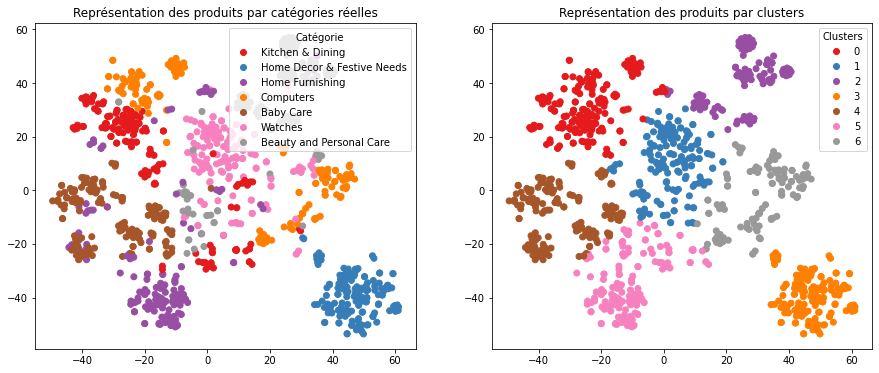

ARI :  0.5541


In [24]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## Word2Vec
### Import libraries

In [25]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

### Creation & training of Word2Vec model

In [26]:
w2v_size=300
w2v_window=5
w2v_min_count=1
w2v_epochs=100
maxlen = 400 # adapt to length of descriptions
descriptions = data_T['description_bow_lem'].to_list()
descriptions = [gensim.utils.simple_preprocess(text) for text in descriptions]

In [27]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")

# Build the model
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count, window=w2v_window,
                                                vector_size=w2v_size,
                                                seed=42,
                                                workers=1)
#                                                workers=multiprocessing.cpu_count())  # To accelerate execution time

# Build the vocabulary
w2v_model.build_vocab(descriptions)

# Training
w2v_model.train(descriptions, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)

# Vectors 
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key

# Summary
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 4712
Word2Vec trained


### Tokenization

In [28]:
# Préparation des descriptions (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(descriptions)
x_descriptions = pad_sequences(tokenizer.texts_to_sequences(descriptions),
                                                     maxlen=maxlen,
                                                     padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4713


### Creation of _embedding matrix_

In [29]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4713, 300)


### Creation of _embedding model_

In [30]:
# Création du modèle

input=Input(shape=(len(x_descriptions),maxlen),dtype='float64')

word_input=Input(shape=(maxlen,),dtype='float64')  

word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)

word_vec=GlobalAveragePooling1D()(word_embedding)  

embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 400)]             0         
                                                                 
 embedding (Embedding)       (None, 400, 300)          1413900   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 1,413,900
Trainable params: 1,413,900
Non-trainable params: 0
_________________________________________________________________


### Model execution

In [31]:
embeddings = embed_model.predict(x_descriptions)
embeddings.shape

33/33 [==============================] - 0s 7ms/step


(1050, 300)

In [32]:
ARI, X_tsne, labels = ARI_fct(embeddings)

C:\Users\I-NL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


ARI :  0.3261  Exectution time :  12.0


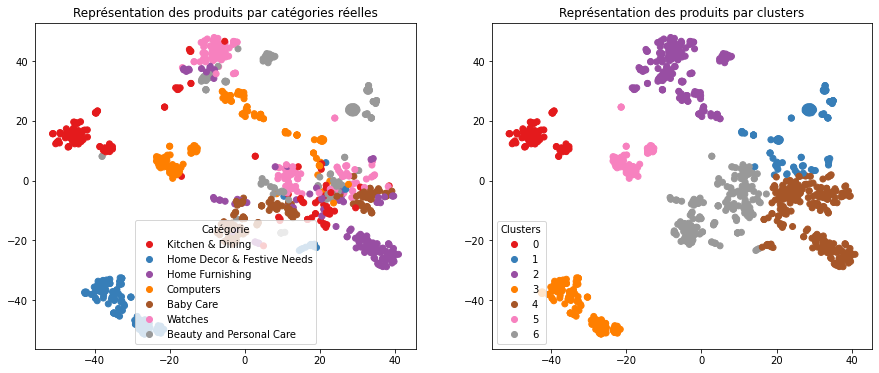

ARI :  0.3261


In [33]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

## BERT - _Deep Learning_
### Settings
#### Import libraries

In [34]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [35]:
#print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.10.0
2.10.0
Num GPUs Available:  0
True


#### BERT function 

In [36]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    """
    This function pre-process raw text data for BERT algorithm.
    
    Input :
    - sentences : raw text data (str)
    - bert_tokenizer : tonekizer from bert (function)
    - max_length : maximum length of sentences (int)
    
    Output : 
    - input_ids : (array)
    - token_type_ids : list of tokens (array)
    - attention_mask : (array)
    - bert_inp_tot : inputs ready for bert algorithm (array)
    
    """
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    
    """
    This function creates the text features for BERT algorithm.
    
    Input :
    - model : pre-trained model to load (function)
    - model_type : name of bert model (str)
    - sentences : text data pre-processed with bert_inp_fct() (str)
    - max_length : maximum length for sentences (int)
    - b_size : size of batch (int)
    - mode :  mode for BERT, 'HF' for HuggingFace or 'TFhub' for Tensorflow Hub (str)
    
    Output :
    - features_bert : array for features classification (array)
    - last_hidden_states_tot : array of features from model (array)
    
    """
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

### BERT HuggingFace

#### Model and sentences initialization

The model type used is _'bert-base-uncased'_

In [37]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = data_T['description_dl'].to_list()

#### Features creation

In [38]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 1s 1s/step
temps traitement :  136.0


#### Model execution

In [39]:
ARI, X_tsne, labels = ARI_fct(features_bert)

C:\Users\I-NL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


ARI :  0.3256  Exectution time :  18.0


#### Visual analysis

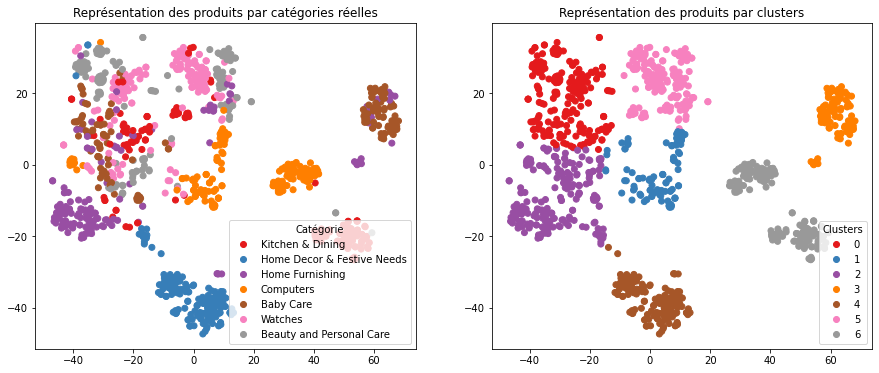

ARI :  0.3256


In [40]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

### BERT hub Tensorflow
#### Initialization of model and settings

In [41]:
import tensorflow_hub as hub
import tensorflow_text 

# Guide sur le Tensorflow hub : https://www.tensorflow.org/text/tutorials/classify_text_with_bert
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [42]:
sentences = data_T['description_dl'].to_list()

#### Creation of features

In [43]:
# Execution time about 15 min
max_length = 400  # Adapted to description length
batch_size = 10 
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

temps traitement :  964.0


#### Model execution

In [44]:
ARI, X_tsne, labels = ARI_fct(features_bert)

C:\Users\I-NL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


ARI :  0.2936  Exectution time :  21.0


#### Visual analysis

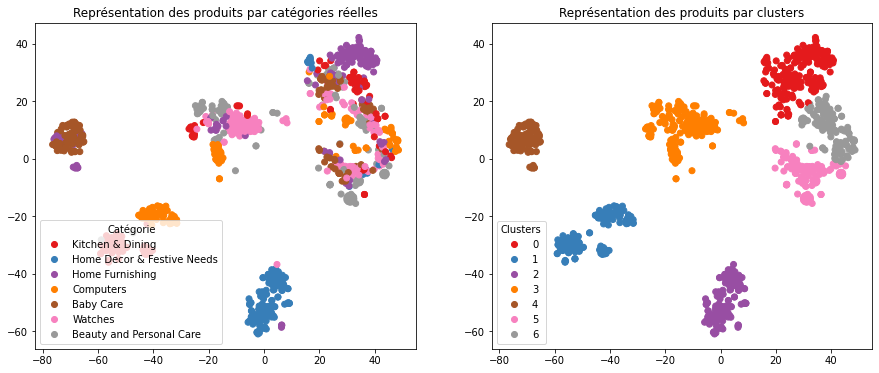

ARI :  0.2936


In [45]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

__Conclusion about BERT models__

These pre-trained models are interesting, however they are not trained with very similar text data (with respect to our corpus), so the ARI of resulting cluster is lower than with tf-idf of bag-of-word methods.

Nevertheless, the clustering seems to separate in very distinct clusters the products.

## USE - Universal Sentence Encoder
### Import libraries

In [48]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [47]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.10.0
2.10.0
Num GPUs Available:  0
True


### USE functions

In [49]:
def feature_USE_fct(sentences, b_size) :
    """
    This function creates text features for USE model (Universal Sentence Encoder). 
    
    Input :
    - sentences : list of sentences text data (list of str)
    - b_size : batch size (int)
    
    Output : features : features for USE model (array)
    """
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

### Setting and features creation

In [50]:
batch_size = 10
sentences = data_T['description_dl'].to_list()

In [51]:
features_USE = feature_USE_fct(sentences, batch_size)

### Model execution

In [52]:
ARI, X_tsne, labels = ARI_fct(features_USE)

C:\Users\I-NL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


ARI :  0.435  Exectution time :  20.0


### Visual analysis

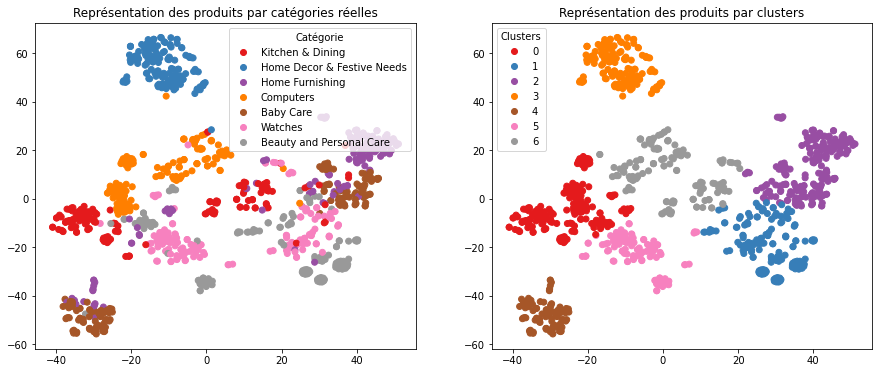

ARI :  0.435


In [53]:
TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# Conclusion about text data

* Tf-idf is the most efficient method over bag-of-word approach
* USE is the most efficient embedding method for this dataset
* Pre-trained models seems as efficient as counting methods for this dataset 
* ARI over 0.5 suggests that it is possible to reach an automatic classification regarding to product description. Further analysis need to be performed using a supervised machine learning classification algorithm

# Part 2 - Visual data 
## SIFT
### Initialization
#### Import libraries and settings

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir
path = "C:/Users/I-NL/OneDrive/Bureau/OC-DS/Projet_6/Flipkart/Images/"
list_photos = [file for file in listdir(path)]
print(len(list_photos))

1050


#### Load dataset

In [5]:
# Reading csv file to import data
data_I = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')

# Selecting the columns of interest
data_I = data_I [['product_name', 'image', 'product_category_tree']]
data_I.head()

,product_name,image,product_category_tree
0,Elegance Polyester Multicolor Abstract Eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[""Home Furnishing >> Curtains & Accessories >>..."
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
3,SANTOSH ROYAL FASHION Cotton Printed King size...,d4684dcdc759dd9cdf41504698d737d8.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."
4,Jaipur Print Cotton Floral King sized Double B...,6325b6870c54cd47be6ebfbffa620ec7.jpg,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."


#### Defining categories

In [6]:
# Split of product_category_tree to extract only the categorie of level 0

product_category_tree = data_I['product_category_tree'].str.split(pat='>>', expand=True)

product_category_tree.columns = ['product_category_name_0',
                                      'product_category_name_1',
                                      'product_category_name_2',
                                      'product_category_name_3',
                                     'product_category_name_4',
                                     'product_category_name_5',
                                     'product_category_name_6']

In [7]:
product_category_tree['product_category_name_0'] = product_category_tree['product_category_name_0'].replace(
    to_replace=('["Home Furnishing ',
                '["Baby Care ',
                '["Watches ',
                '["Home Decor & Festive Needs ',
                '["Kitchen & Dining ',
                '["Beauty and Personal Care ',
                '["Computers '),
    value=('Home Furnishing',
           'Baby Care',
           'Watches',
           'Home Decor & Festive Needs',
           'Kitchen & Dining',
           'Beauty and Personal Care',
           'Computers'))

In [8]:
# Addition of product_category columns
data_I = pd.merge(data_I, product_category_tree, left_index=True, right_index=True)

# We decided to use only level 0 category so the others are droped
droplist = ['product_category_tree',
            'product_category_name_1',
            'product_category_name_2',
            'product_category_name_3',
            'product_category_name_4', 
            'product_category_name_5',
            'product_category_name_6']

data_I = data_I.drop(droplist, axis=1)

In [9]:
# Encoding labels with Label Encoder

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_I["label"] = le.fit_transform(data_I["product_category_name_0"])
data_I.head()

,product_name,image,product_category_name_0,label
0,Elegance Polyester Multicolor Abstract Eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,4
1,Sathiyas Cotton Bath Towel,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,0
2,Eurospa Cotton Terry Face Towel Set,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,0
3,SANTOSH ROYAL FASHION Cotton Printed King size...,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,4
4,Jaipur Print Cotton Floral King sized Double B...,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,4


In [10]:
data_I.groupby("product_category_name_0").count()

,product_name,image,label
product_category_name_0,,,
Baby Care,150,150,150
Beauty and Personal Care,150,150,150
Computers,150,150,150
Home Decor & Festive Needs,150,150,150
Home Furnishing,150,150,150
Kitchen & Dining,150,150,150
Watches,150,150,150


In [11]:
#Définition de la liste de catégories
l_cat = list(set(data_I['product_category_name_0']))
y_cat_num = [(1-l_cat.index(data_I.iloc[i]['product_category_name_0'])) for i in range(len(data_I))]

In [12]:
list_photos = [img for img in data_I['image']]
print(len(list_photos))

1050


### Displaying of some image examples by category

Watches


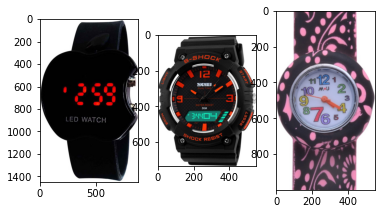

Baby Care


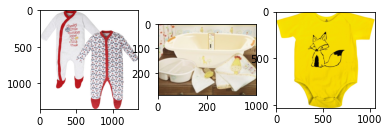

Computers


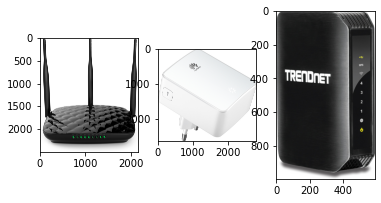

Home Furnishing


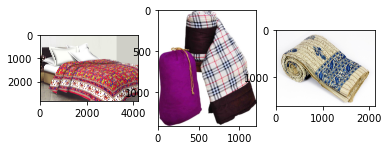

Kitchen & Dining


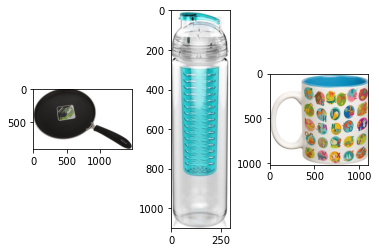

Home Decor & Festive Needs


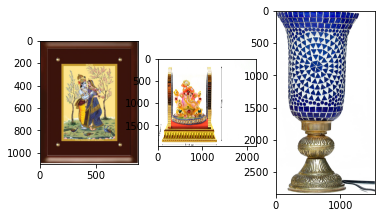

Beauty and Personal Care


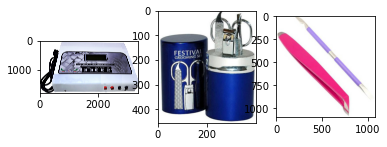

In [11]:
from matplotlib.image import imread

def list_fct(name) :
    """
    This function creates a list of images according to their category name
    Input : name : photo name (str)
    Output : list_image_name (list)
    """
    list_image_name = [list_photos[i] for i in range(len(data_I)) if data_I["product_category_name_0"][i]==name]
    return list_image_name

list_baby_care=[list_photos[i] for i in range(len(data_I)) if data_I["product_category_name_0"][i]=="Baby Care"]
list_beauty=[list_photos[i] for i in range(len(data_I)) if data_I["product_category_name_0"][i]=="Beauty and Personal Care"]
list_computers=[list_photos[i] for i in range(len(data_I)) if data_I["product_category_name_0"][i]=="Computers"]
list_home_decor=[list_photos[i] for i in range(len(data_I)) if data_I["product_category_name_0"][i]=="Home Decor & Festive Needs"]
list_home_furnishing=[list_photos[i] for i in range(len(data_I)) if data_I["product_category_name_0"][i]=="Home Furnishing"]
list_kitchen=[list_photos[i] for i in range(len(data_I)) if data_I["product_category_name_0"][i]=="Kitchen & Dining"]
list_watches=[list_photos[i] for i in range(len(data_I)) if data_I["product_category_name_0"][i]=="Watches"]

for name in l_cat :
    print(name)
    # print("-------")
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path + list_fct(name)[i+14]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

###  Determination of SIFT descriptors and display, step-by-step

- The example image contains 47651 descriptors
- Each descriptor is a vector of length = 128


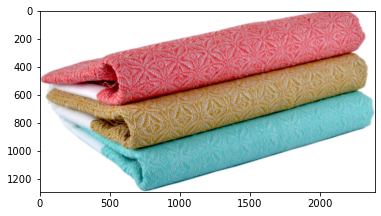

In [83]:
from matplotlib.image import imread

# Load image
img = imread(path+list_photos[1],0) # load image with PIL

# Display image
plt.imshow(img)
plt.show()


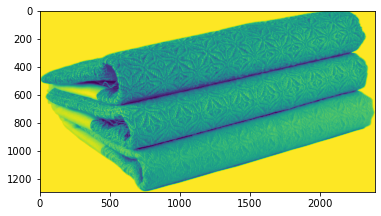

In [84]:
import cv2

sift = cv2.SIFT_create()
image = cv2.imread(path+list_photos[1],0) # load image with cv2
plt.imshow(image)
plt.show()

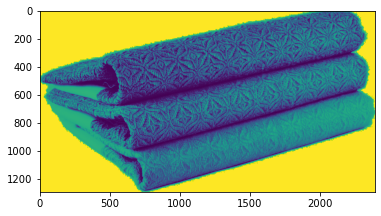

In [85]:
image = cv2.equalizeHist(image)   # equalize image histogram
plt.imshow(image)
plt.show()

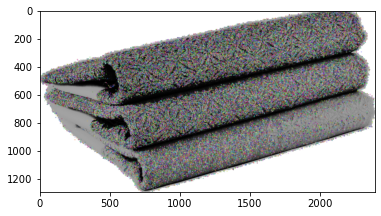

Descripteurs :  (47651, 128)

[[ 85. 113.  31. ...   0.   0.   0.]
 [ 29.  80.  73. ...   0.   0.   0.]
 [ 10.  67. 115. ...   0.   0.  22.]
 ...
 [  0.   0.   0. ...   0.   0.  13.]
 [ 40.   0.   0. ...   0.   0.  51.]
 [ 37.   1.   0. ...   0.   0.   0.]]


In [86]:
kp, des = sift.detectAndCompute(image, None)  # SIFT pretreatment
img=cv2.drawKeypoints(image,kp,image)  # Draw keypoints on the image
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

### Creations of descriptors for each image

__Image pre-treatment via SIFT__

- For each image, conversion in gray scale and histogram equalization
- Creation of a descriptors list by image (__sift_keypoints_by_img__), which will be used to realise the images' histograms
- Creation of a descriptors list for the total ensemble of images (__sift_keypoints_all__), which will be used to create the descriptors clusters

In [13]:
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create(500)
# sift = cv2.xfeatures2d.SIFT_create(500)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)  # To vizualise the process advancements
    image = cv2.imread(path+list_photos[image_num],0) # load and color conversion
    image = cv2.resize(src=image, dst=image, dsize=(200,300), fx=0.5, fy=0.5) # Re-scale images 
                                                                        # to 200*300 max, divided by 2
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)  
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (343468, 128)
temps de traitement SIFT descriptor :            24.38 secondes


C:\Users\I-NL\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


### Creation of descriptors clusters

Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables


In [58]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

# Estimation  of number of cluster is squareroot of keypoints number
print("Nombre de clusters estimés : ", k)
k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=77)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  586
Création de 586 clusters de descripteurs ...


C:\Users\I-NL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1280 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


temps de traitement kmeans :             4.74 secondes


### Creation of images features

* For each image : 
   - prediction of cluster label for each descriptor
   - creation of an histogram = counting the number of image descriptors for each cluster label
   
__NB:__ Image Features = Image Histogramme = Counting number of descriptors per cluster, for one image

In [15]:
temps1=time.time()

# Creation of histograms (features)
def build_histogram(kmeans, des, image_num):
    """
    This function creates histograms of images as image features.
    
    Input :
    - kmeans : K-Means clustering model (model)
    - des : image descriptors, from SIFT (array) 
    - image_num : index of image (int)
    
    Output : hist : array
    """
    
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))  # Initialize array with zeros
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num) # Indicates problems
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  # Shows ongoing process
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :            19.17 secondes


### Dimension reduction de dimensions
#### Principal Component Analysis

PCA enables to create uncorrelated features, with lower dimension, while keeping a high explained variance (here 99%). It will ease data separation with t-SNE and lead to lower execution time


In [59]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca = pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 586)
Dimensions dataset après réduction PCA :  (1050, 472)


#### t-SNE

t-SNE enables dimension reduction in 2 components, to display 2D graphics.

In [60]:
ARI, X_tsne, labels = ARI_fct(feat_pca)

C:\Users\I-NL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


ARI :  0.0437  Exectution time :  10.0


### Results analyses
#### Visual analysis

SIFT is not appropriate to treat this dataset... 
- ARI is very low (almost 0)
- Clusters are not separated and seems to overlap, according to true categories

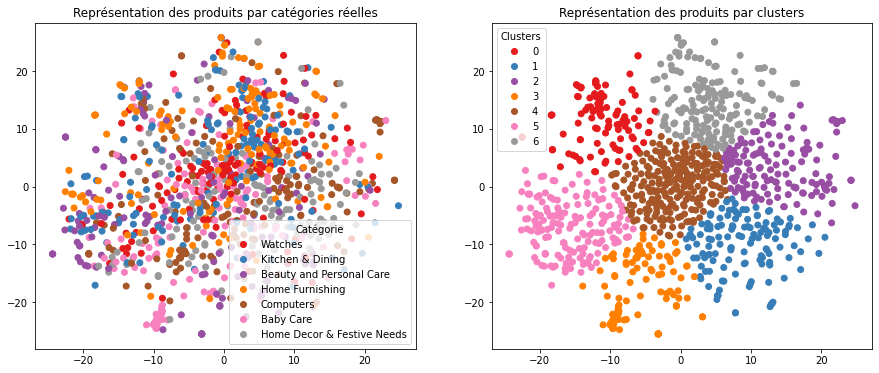

ARI :  0.0437


In [61]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

#### Analysis by classes

In [64]:
df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["cluster"] = labels
df_tsne["class"] = data_I["product_category_name_0"]
df_tsne["label"] = data_I["label"]
print(df_tsne.shape)

(1050, 5)


In [65]:
df_tsne.head()

,tsne1,tsne2,cluster,class,label
0,15.785162,12.285364,2,Home Furnishing,4
1,2.646502,15.398341,6,Baby Care,0
2,19.291912,0.348229,2,Baby Care,0
3,3.120703,17.570969,6,Home Furnishing,4
4,7.132718,15.947616,6,Home Furnishing,4


In [66]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    102
1    135
2    145
3    104
4    233
5    161
6    170
Name: class, dtype: int64

In [77]:
true_labels = data_I['label']
predicted_labels = df_tsne['cluster']

Text(33.0, 0.5, 'True labels')

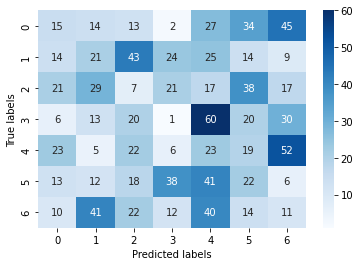

In [73]:
conf_mat = metrics.confusion_matrix(true_labels, labels)

sns.heatmap(conf_mat, annot=True, cmap='Blues') 
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
# True labels numbers and predicted labels numbers are not matching !
# But we clearly see that the predictions are not accurate

In [38]:
print(metrics.classification_report(y_cat_num, labels))

              precision    recall  f1-score   support

          -5       0.00      0.00      0.00       150
          -4       0.00      0.00      0.00       150
          -3       0.00      0.00      0.00       150
          -2       0.00      0.00      0.00       150
          -1       0.00      0.00      0.00       150
           0       0.13      0.09      0.10       150
           1       0.30      0.27      0.29       150
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.05      1050
   macro avg       0.04      0.03      0.03      1050
weighted avg       0.06      0.05      0.06      1050



C:\Users\I-NL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I-NL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I-NL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\I-NL\anaconda3\lib\site-packages\sklearn\metrics\_classif

## CNN & Transfer Learning - VGG16
### Settings for VGG16
#### Import libraries

In [45]:
# example of using the vgg16 model as a feature extraction model

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Optimizer
from keras.applications.vgg16 import preprocess_input, VGG16, decode_predictions
from keras.models import Model
from keras.layers import Dense
from pickle import dump

#### Image preprocessing

In [53]:
dataset_img = []
for image_num in range(len(list_photos)) :
    img = load_img(path+list_photos[image_num], target_size=(224, 224))  # load an image from file
    img = img_to_array(img)  # convert the image pixels to a numpy array
    img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))   # reshape data for the model
    img = preprocess_input(img)  # prepare the image for the VGG model
    dataset_img.append(img)

C:\Users\I-NL\anaconda3\lib\site-packages\PIL\Image.py:2918: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [62]:
img_array = np.asarray(dataset_img)

In [63]:
print(img_array.shape)

(1050, 1, 224, 224, 3)


#### Initialization of pre-trained VGG16 

In [65]:
# load model
model = VGG16()

# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

### Transfer learning

#### Features extraction without re-training 

In [67]:
# get extracted features
features = []
for img in img_array:
    feat=model.predict(img)
    feat=feat.flatten()
    features.append(feat)

1/1 [==============================] - 1s 1s/step


1/1 [==============================] - 1s 604ms/step


1/1 [==============================] - 1s 616ms/step


1/1 [==============================] - 1s 644ms/step


In [68]:
features_array = np.asarray(features)
print(features_array.shape)

(1050, 4096)


### Dimension reduction
#### PCA

In [69]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", features_array.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca = pca.fit_transform(features_array)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 4096)
Dimensions dataset après réduction PCA :  (1050, 803)


#### t-SNE
##### Import libraries

In [27]:
# Import des librairies
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import cluster, metrics

##### Functions

In [28]:
import time

# Calcul Tsne, détermination des clusters et calcul ARI entre vrais catégories et n° de clusters
def ARI_fct(features) :
       """
    This function prepares extracted features (from text or images)
    for clustering and graphical representation, with ARI calculation.
    t-SNE reduces to 2 components the features vector
    K-Means clustering creates clusters (one per true category label)
    ARI is calculated with numerical category labels (y_cat_num, i.e. true labels)
    and K-Means clusters labels (predicted labels). Print out the execution time.
    Input : features : array, extracted features (array)
    Output : 
    - ARI: Adjusted Rand Index (float)
    - X_tsne : result of tsne manifold decomposition (array) 
    - cls.labels_ : predicted labels from K-Means clustering (array)
    
    """
        
    time1 = time.time()
    num_labels=len(l_cat)
    
    tsne = manifold.TSNE(n_components=2, perplexity=30, n_iter=2000, 
                                 init='pca', learning_rate=200, random_state=77)
    X_tsne = tsne.fit_transform(features)
    
    # Détermination des clusters à partir des données après Tsne 
    cls = cluster.KMeans(n_clusters=num_labels, n_init=100, random_state=77)
    cls.fit(X_tsne)
    ARI = np.round(metrics.adjusted_rand_score(y_cat_num, cls.labels_), 4)
    time2 = np.round(time.time() - time1,0)
    print("ARI : ", ARI, " Exectution time : ", time2) 
    
    return ARI, X_tsne, cls.labels_ 


# visualisation du Tsne selon les vraies catégories et selon les clusters
def TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI) :
      
    """
    This function creates a figure with 2 subplots : 
    - Results of clustering according to true labels (left)
    - Results of clustering according to predicted labels from ARI_fct() (right)
    Input :
    - X_tsne : result of tsne manifold decomposition (array) 
    - y_cat_num : numerically encoded target category (list)
    - labels : clusters category labels (array)
    - ARI: Adjusted Rand Index (float)
    Output : 
    - fig : matplotlib.pyplot figure, with 2 subplots
    - print ARI 
    """
    
    fig = plt.figure(figsize=(15,6))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=y_cat_num, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Catégorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1], c=labels, cmap='Set1')
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')
    
    plt.show()
    print("ARI : ", ARI)


### Model execution

In [70]:
ARI, X_tsne, labels = ARI_fct(feat_pca)

C:\Users\I-NL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


ARI :  0.4818  Exectution time :  14.0


### Visual analysis

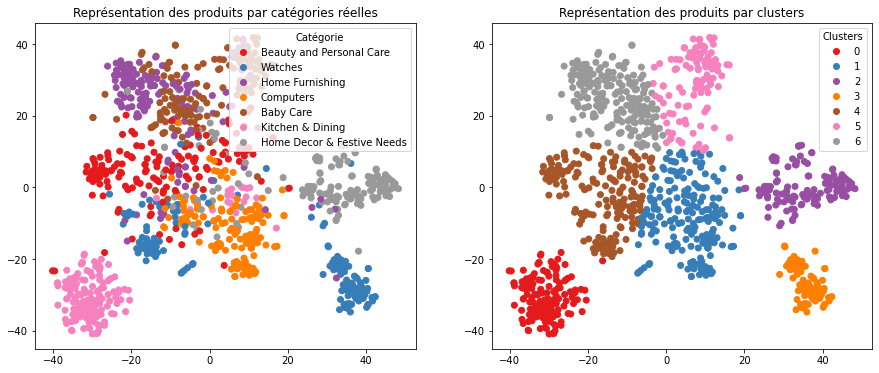

ARI :  0.4818


In [71]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

# Conclusion about visual data

* SIFT is not adapted for this dataset 
* CNN with Transfer Learning, even without any retraining of the neural network, is able to categorize products from their image (ARI = 0.48). A deeper model training could lead to an accurate automatic classification.


## Gathering of image and description features 

In this part, features extracted from text data and images, using the best models (tf-idf and VGG16), are gathered in one array. ARI is calculated as previously.

### Features concatenation

In [68]:
all_features = np.concatenate((features_array, ctf_transform), axis=1) 
# Concatenate features from VGG16 model and tf-idf in the same array

### t-SNE, clustering and ARI

In [69]:
ARI, X_tsne, labels = ARI_fct(all_features)

C:\Users\I-NL\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


ARI :  0.4996  Exectution time :  21.0


### Visual analysis

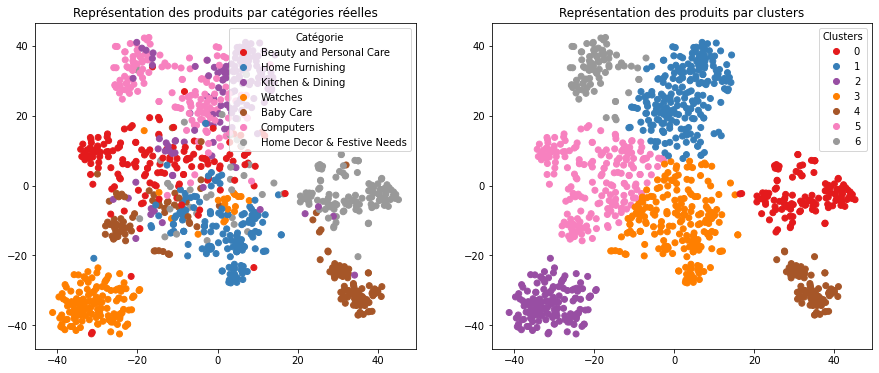

ARI :  0.4996


In [70]:
 TSNE_visu_fct(X_tsne, y_cat_num, labels, ARI)

- Interestingly, ARI for all features is in between ARI_images and ARI_descriptions. 
- Clusters are not well separated but it is enough to distinguish categories.
- Further tuning is envisaged to optimize automatic classification, using supervised machine learning 

## Conclusion 

Several approach were tested to study the feasibility of an automatic product classification based on images and description. With unsupervised learning, results of ARI reaches 0.55 comparing description clustering vs. true labels, and 0.48 comparing images clustering vs. true labels. This is satisfying for unsupervised machine learning models. 
Automatic classification is feasible. Further training is even though required to optimize the model.

## For fun - not working yet

In [76]:
# visualisation du Tsne selon les vraies catégories et selon les clusters, avec les images des objets

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

img_path = []
for i in range (len(data_I['image'])):
    im_path = path + data_I.iloc[i]['image']
    img_path.append(im_path)

def getImage(img_path, zoom=0.05):
    img = OffsetImage(plt.imread(img_path, ), zoom=zoom)
    return 

def tSNE_visu_img_fct(X_tsne, y_cat_num, labels, ARI) :
    fig = plt.figure(figsize=(14, 7))
    
    ax = fig.add_subplot(121)
    scatter = ax.scatter(X_tsne[:,0], X_tsne[:,1])   # c=labels, cmap='Set1'
    
    for x, y, img in zip(X_tsne[:,0] , X_tsne[:,1], img_path):
        ab = AnnotationBbox(getImage(img), (x, y), frameon=False)  # Add image to the scatterpoint
        ax.add_artist(ab)
        
    ax.legend(handles=scatter.legend_elements()[0], labels=l_cat, loc="best", title="Catégorie")
    plt.title('Représentation des produits par catégories réelles')
    
    ax = fig.add_subplot(122)
    scatter = ax.scatter(X_tsne[:,0],X_tsne[:,1]) # c=labels, cmap='Set1'
    
    for x, y, img in zip(X_tsne[:,0] , X_tsne[:,1], img_path):
        ab = AnnotationBbox(getImage(img_path[img]), (x, y), frameon=False)  # Add image to the scatterpoint
        ax.add_artist(ab)
        
    ax.legend(handles=scatter.legend_elements()[0], labels=set(labels), loc="best", title="Clusters")
    plt.title('Représentation des produits par clusters')

    plt.show()
    print("ARI : ", ARI)

In [75]:
img_path = []
for i in range (len(data_I['image'])):
    im_path = path + data_I.iloc[i]['image']
    img_path.append(im_path)
print(img_path[0])

C:/Users/I-NL/OneDrive/Bureau/OC-DS/Projet_6/Flipkart/Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg


In [77]:
tSNE_visu_img_fct(X_tsne, y_cat_num, labels, ARI)

AttributeError: 'NoneType' object has no attribute 'set_figure'

AttributeError: 'NoneType' object has no attribute 'get_extent'

<Figure size 1008x504 with 1 Axes>

In [ ]:
# Display images on the scatterplot
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path, zoom=1):
    return OffsetImage(plt.imread(path), zoom=zoom)

paths = [
    'a.jpg',
    'b.jpg',
    'c.jpg',
    'd.jpg',
    'e.jpg']
    
x = [0,1,2,3,4]
y = [0,1,2,3,4]

fig, ax = plt.subplots()
ax.scatter(x, y) 

for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)